From scientific fields such as meteorology and climatology, through to the software on our smartphones such as Google Maps and Facebook checkins, geographic data play a huge role on our daily lives. However, raw geographic data such as latitudes and longitudes are difficult to understand for general public. This is why this project is created to explore the fundamentals of geographic coordinate systems and how to work with the basemap library to plot geographic data points on maps. 

This time we would work with flight data from the __[openflights](https://openflights.org/data.html)__. Here is the breakdown of files we'll be working with and the most pertinent columns from each dataset:
1. airlines.csv - data on each airline.
country - where the airline is headquartered.
active - if the airline is still active.
2. airports.csv - data on each airport.
name - name of the airport.
city - city the airport is located.
country - country the airport is located.
code - unique airport code.
latitude - latitude value.
longitude - longitude value.
3. routes.csv - data on each flight route.
airline - airline for the route.
source - starting city for the route.
dest - destination city for the route.

From these data sets, 2 interesting questions would be examined:
- For each airport, which destination airport is the most common?
- Which cities are the most important hubs for airports and airlines?

## Visualizing Geographic Coordinate Systems with Scatter Plot

In [1]:
import pandas as pd

airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
routes = pd.read_csv("routes.csv")

print(airlines.iloc[0])
print(airports.iloc[0])
print(routes.iloc[0])

id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object
id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object
airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object


As can be seen from 3 tables above, the latitude and longtitude values are written in very 'hard-to-understand' for common public readers (latitude values range from -90 to 90 degrees and longitude values range from -180 to 180 degrees). We will then covert these coordinates to the Cartesian coordinate system using a map projection. In this case, Mercator projection will be used as it is commonly used by popular mapping software.

In [2]:
#create a new basemap instance with the specific map projection we want to use and how much of the map we want included
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap #basemap has to be installed in anaconda beforhands

#convert spherical coordinates to Cartesian coordinates using the basemap instance
#llcrnrlat: latitude of lower left hand corner of the desired map domain, urcrnrlat: latitude of lower left hand corner of the desired map domain and the same for longtitudes
m = Basemap(projection ='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()

x, y=m(longitudes, latitudes)

C:\Users\Little\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


We can then plot coordinates on a map after the data is in the right format. A scatter plot is the simpliest way to plot points on a map, where each point is represented as an (x,y) coordinate pair. 

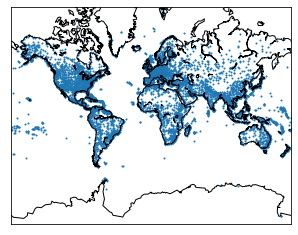

In [3]:
m.scatter(x,y, s=1) #customie the size of each marker using the s parameter
m.drawcoastlines() #enable outlines of coasts
plt.show()

Since basemap uses matplotlib under the hood, we can interact with the matplotlib classes that basemap uses directly to customize the appearance of the map. 

C:\Users\Little\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


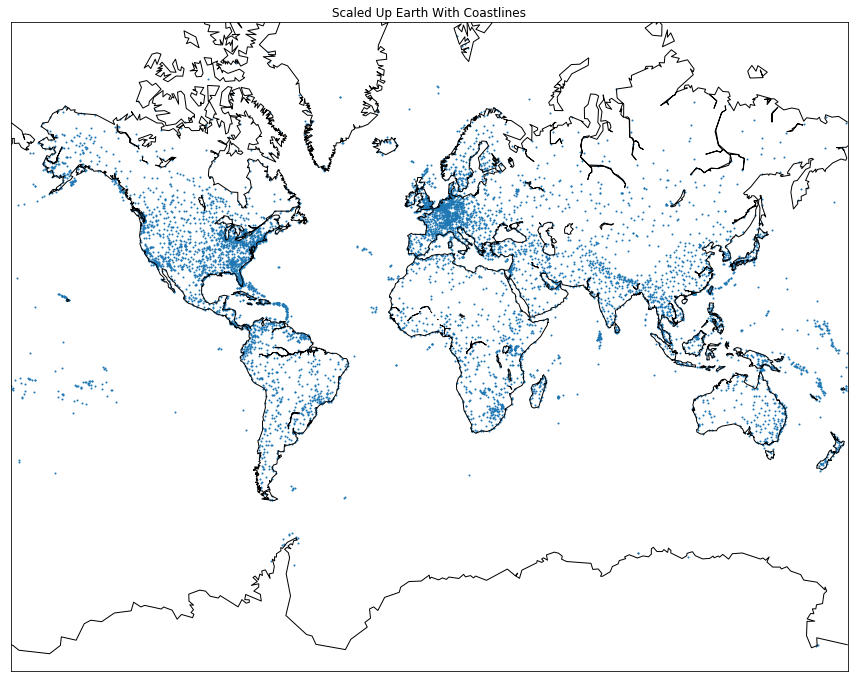

In [4]:
#create a figure with a height of 20 inches and a width of 15 inches
fig, ax = plt.subplots(figsize=(15,20))
plt.title('Scaled Up Earth With Coastlines')

m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()

plt.show()

## Great Circles

To understand better the flight routes, we can draw great circles to connect starting and ending locations on a map. A great circles is the shortest circle connecting 2 points on a sphere. 

While the 'routes' dataframe contains the source and destination airports for each route, the latitude and longi values for each airport are in a 'airports' dataframe. To make things easier, a new CSV file has been created that contains the latitude and longtitude values corresponding to the soursce and destination airports for each route. 

In [5]:
geo_routes = pd.read_csv('geo_routes.csv')
geo_routes.info() #check the dataset
print(geo_routes.head(5)) #print the first 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB
  airline source dest equipment  start_lon    end_lon  start_lat    end_lat
0      2B    AER  KZN       CR2  39.956589  49.278728  43.449928  55.606186
1      2B    ASF  KZN       CR2  48.006278  49.278728  46.283333  55.606186
2      2B    ASF  MRV       CR2  48.006278  43.081889  46.283333  44.225072
3      2B    CEK  KZN       CR2  61.503333  49.278728  55.305836  55.606186
4      2B    CEK  OVB       CR2  61.503333  82.650656  55.305836  55.012622


C:\Users\Little\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


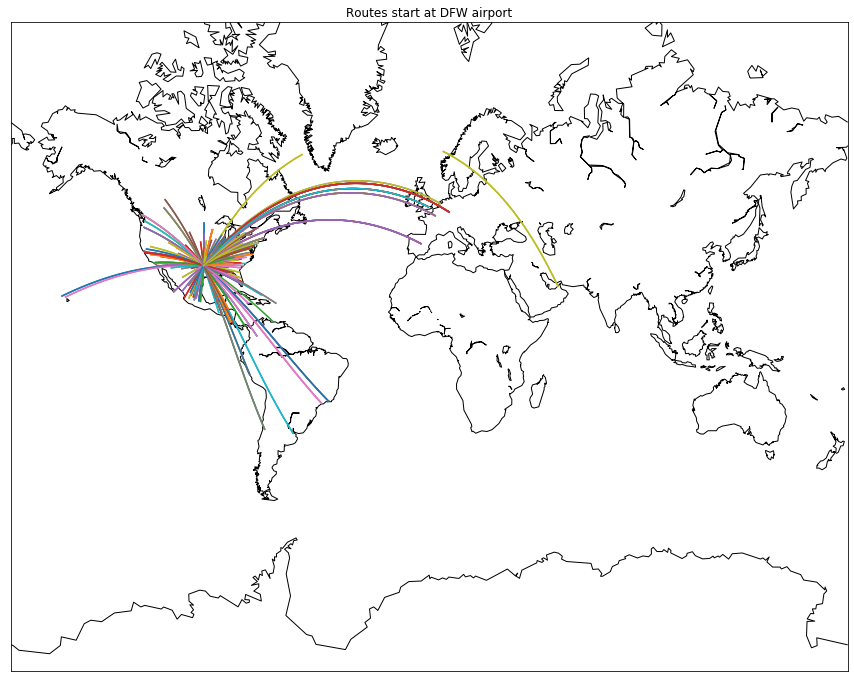

In [6]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

#create a function that draws a great circle for each route that has an absolute difference in the latitude and longitude value less than 180
def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if abs(end_lat-start_lat)<180:
            if abs(end_lon-start_lon)<180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

dfw = geo_routes[geo_routes['source']=='DFW']

create_great_circles(dfw)
plt.title('Routes start at DFW airport')
plt.show()